# Titanic Project

We will take a look at a dataset containing information about passengers on board the titanic. We will attempt to answer a few questions:

- Who were the passengers (Age, Sex, Class etc...)?
- What is the relationship between a passenger's class and what deck they were on?
- Where did the passengers embark?
- Who was alone and who was with family?
- What kind of people were more likely to survive?

First of all, let's import all of the packages that will be required:

In [43]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

titanic_df = pd.read_csv(r'C:\Users\oconn\Projects\train_tita.csv')

Let's take a look at some of the data

In [44]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Summary statistics:

In [3]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's get some general info such as number of entries, datatypes used, column names and number of null values...

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that there are very few columns with a large number of null values apart from the Cabin column. Cabin is the only column with a large number of null values.

Next, we will try to get a sense of who the passengers were.

Let's take a look at the gender profile:

male      577
female    314
Name: Sex, dtype: int64

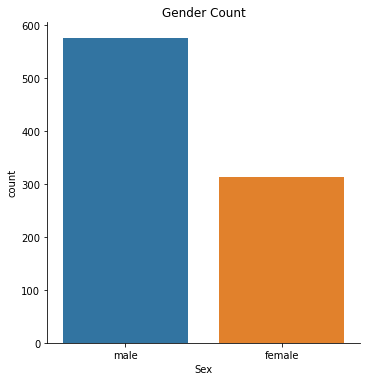

In [5]:
sns.catplot(x='Sex',data=titanic_df,kind='count')
plt.title('Gender Count')
titanic_df['Sex'].value_counts()

There was almost twice as many males as there were females.

Let's also take a look at the amounts of people in the various classes:

3    491
1    216
2    184
Name: Pclass, dtype: int64

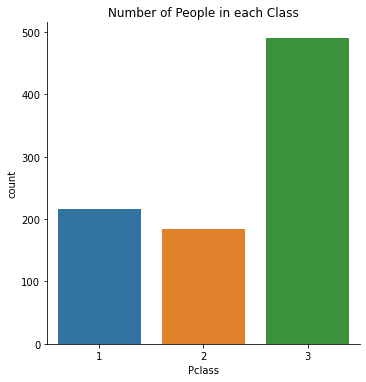

In [6]:
sns.catplot(x='Pclass',data=titanic_df,kind='count')
plt.title('Number of People in each Class')
titanic_df['Pclass'].value_counts()

3rd class made up the bulk of the population. Over half of the passengers on board were 3rd class.

Let's see how much of each gender there was in each class:

Text(0.5, 1.0, 'Class Distribution per Gender')

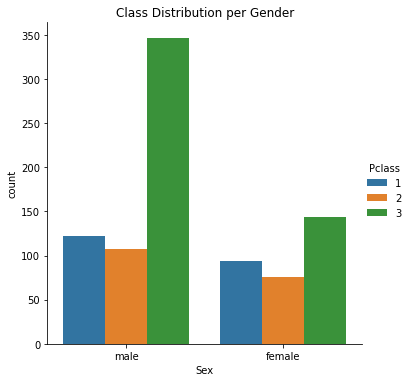

In [7]:
sns.catplot(x='Sex',hue='Pclass',data=titanic_df,kind='count')
plt.title('Class Distribution per Gender')

And let's look at the gender distribution in each class....

Text(0.5, 1.0, 'Gender Distribution per Class')

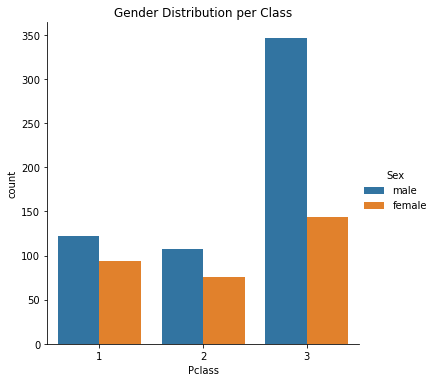

In [8]:
sns.catplot(x='Pclass',hue='Sex',data=titanic_df,kind='count')
plt.title('Gender Distribution per Class')

Interestingly, there's a roughly even spread of females in each class with a little more in 3rd class. There are slightly more males in 1st and 2nd class than females. But there is a disproportionately large amount of males in 3rd class. 3rd class males clearly made up the bulk of the passengers on board.

Now, let's try to distinguish between adults and children. We will categorize people into "male", "female" and "child".

In [9]:
# Creating a function that separates into children, men and women
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [10]:
# Adding a new column
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

Let's see the new column we added....

In [11]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


We will take a look at how many children were on board:

male      537
female    271
child      83
Name: person, dtype: int64

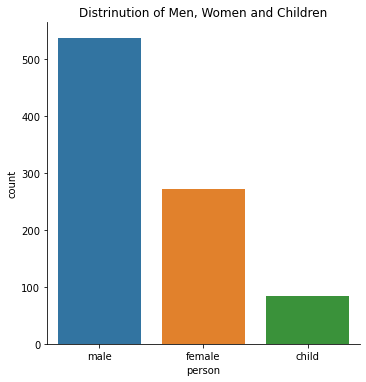

In [12]:
sns.catplot(x='person',data=titanic_df,kind='count')
plt.title('Distrinution of Men, Women and Children')
titanic_df['person'].value_counts()

There were not very many children on board. The vast majority of the passengers were adult males.

Let's see the new distribution of people per calss

Text(0.5, 1.0, 'Class Distribution per Person')

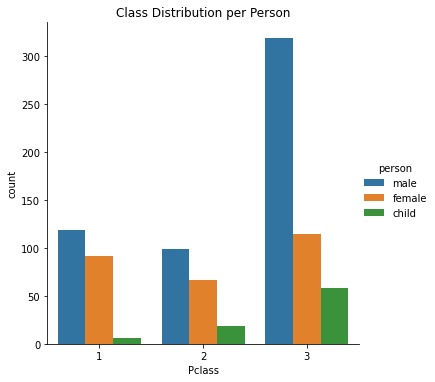

In [13]:
sns.catplot(x='Pclass',hue='person',data=titanic_df,kind='count')
plt.title('Class Distribution per Person')

And the reverse...

Text(0.5, 1.0, 'Adult and Child Distribution per Class')

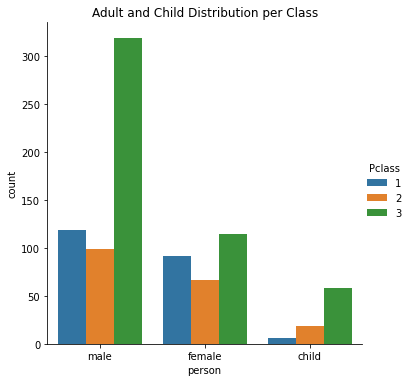

In [14]:
sns.catplot(x='person',hue='Pclass',data=titanic_df,kind='count')
plt.title('Adult and Child Distribution per Class')

There were only a handful of children in 1st and 2nd class. The majority of children were 3rd class. Even after separating the passengers out into adults and children, the vast majority of the passengers are still 3rd class men.

Let's take a look at the age distribution among the passengers...

Text(0, 0.5, 'Count')

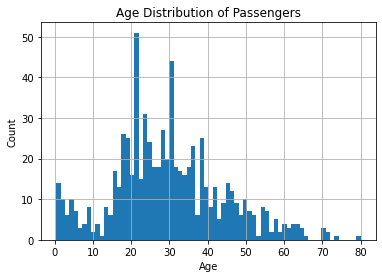

In [15]:
titanic_df['Age'].hist(bins=70)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')

In [16]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The distribution of ages is right skewed and bimodal. There is a large central peak around age 21 or so, and a much smaller peak at the age of about 3 or 4. This indicates that the majority of kids were either infants or toddlers. So there were probably a lot of young families on board.

Let's look at the age distributions among gender, class, adults and children.

Text(0.5, 1.0, 'Kde Plot of Age per Gender')

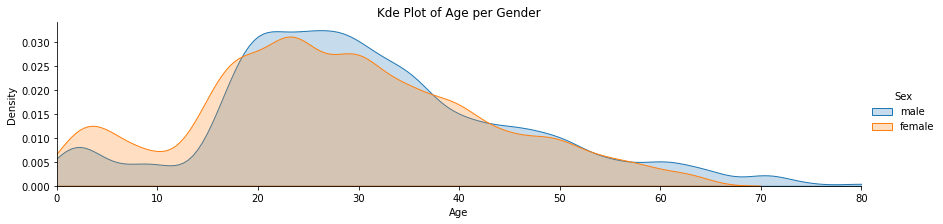

In [17]:
# Facetgrid allows you to do multiple plots on one figure
fig = sns.FacetGrid(titanic_df, hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True,bw_adjust=0.5)
oldest = titanic_df['Age'].max()
fig.add_legend()
fig.set(xlim=(0,oldest))
plt.ylabel('Density')
plt.title('Kde Plot of Age per Gender')

Text(0.5, 1.0, 'Kde Plot of Age per Person')

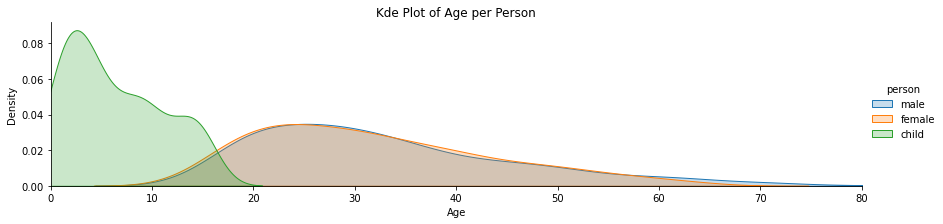

In [18]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.add_legend()
fig.set(xlim=(0,oldest))
plt.ylabel('Density')
plt.title('Kde Plot of Age per Person')

This plot shows the distribution of children by age very well. There is a very prominent peak around the ages of about 3 or 4.

Text(0.5, 1.0, 'Kde Plot of Age per Class')

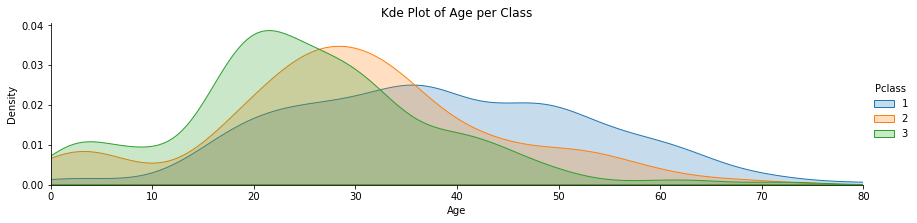

In [19]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True, bw_adjust=0.8)
oldest = titanic_df['Age'].max()
fig.add_legend()
fig.set(xlim=(0,oldest))
plt.ylabel('Density')
plt.title('Kde Plot of Age per Class')

Time to look at what kind of people were on different decks.

Let's make a small dataframe using the data in the cabin and pclass columns. We will then need to drop all null values from the cabin column.

In [93]:
titanic_class_cabins = titanic_df[['Pclass','Cabin']]
deck = titanic_class_cabins.dropna()
cabin_ser = deck['Cabin']
deck

,Pclass,Cabin
1,1,C85
3,1,C123
6,1,E46
10,3,G6
11,1,C103
...,...,...
871,1,D35
872,1,B51 B53 B55
879,1,C50
887,1,B42


The first letter in each string is the deck level. We need to isolate that.

In [94]:
# Taking the first letter out of each string in the cabin column.

levels = []

for level in cabin_ser:
    levels.append(level[0]) 
# set levels to be a new column in deck
deck['Cabin2'] = levels
deck

<ipython-input-94-60f6565365bb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deck['Cabin2'] = levels


,Pclass,Cabin,Cabin2
1,1,C85,C
3,1,C123,C
6,1,E46,E
10,3,G6,G
11,1,C103,C
...,...,...,...
871,1,D35,D
872,1,B51 B53 B55,B
879,1,C50,C
887,1,B42,B


Text(0.5, 1.0, 'Passengers per Level')

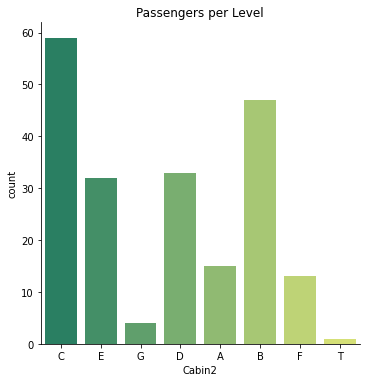

In [95]:
sns.catplot(x='Cabin2',data=deck,palette='summer',kind='count')
plt.title('Passengers per Level')

Looking at a diagram of the titanic, there is no T deck. This entry also only occurs once. It must be a mistake.
Let's also but the levels in alphabetical order.

Text(0.5, 1.0, 'Passengers per Level')

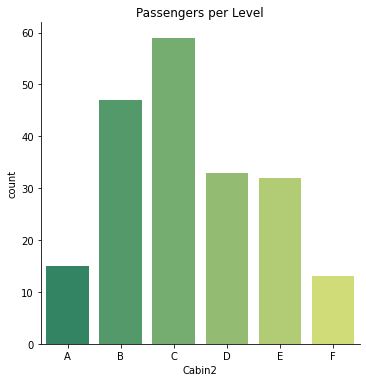

In [96]:
# No such thing as a T cabin gotta get rid of it
deck = deck[deck.Cabin2 !='T']
# Let's also but the cabins in alphabetical order along the x-axis 
cabin_order = ['A','B','C','D','E','F']
sns.catplot(x='Cabin2',data=deck,palette='summer',kind='count',order=cabin_order)
plt.title('Passengers per Level')

Decks B and C had the most passengers. Around 50 and 60 respectively.

Text(0.5, 1.0, 'Passengers per Level per Class')

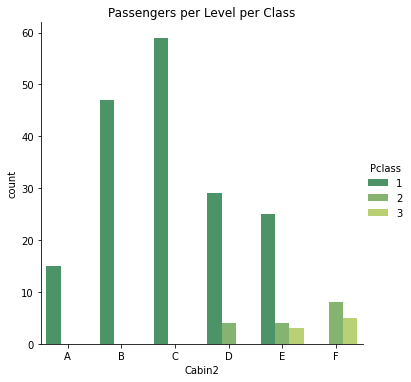

In [97]:
sns.catplot(x='Cabin2',hue='Pclass',data=deck,palette='summer',kind='count',order=cabin_order)
plt.title('Passengers per Level per Class')

Most cabins were inhabited by 1st class passengers (Namely, cabins on decks A through E). Some 2nd and 3rd class passengers had cabins on decks D, E and F.

Let's see the number of passengers who embarked at each location, and their classes.

Text(0.5, 1.0, 'Passenger Boarding Location per Class')

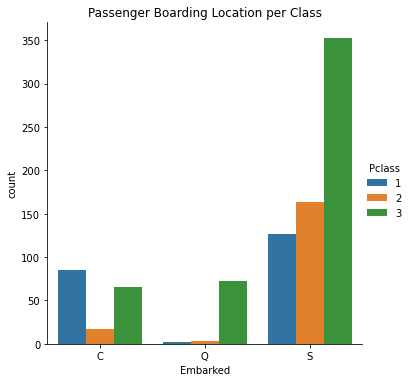

In [98]:
sns.catplot(x='Embarked',data=titanic_df,hue='Pclass',kind='count',order=['C','Q','S'])
plt.title('Passenger Boarding Location per Class')

The vast majority of peaople embarked at Southampton. Most of the 3rd class passengers also embarked here. Almost all of the passengers who boarded at Queenstown were 3rd class. Interestingly, Very few of the passengers who boarder at Cherbourg were 2nd class. The majority were 1st class, and there was almost as many 3rd class passemgers as there were 1st boarding here.

We will now look at who was alone and who was with a family member.
We will make a new column called 'Alone' and poulate it with data based on the SibSp and Parch columns.

In [25]:
# Add a new column to determine who was alone and who wasn't
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone'].loc[titanic_df['Alone']>0]= 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]= 'Alone'

C:\Users\oconn\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [26]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


Let's plot how many were alone and how many had family.

Alone          537
With Family    354
Name: Alone, dtype: int64

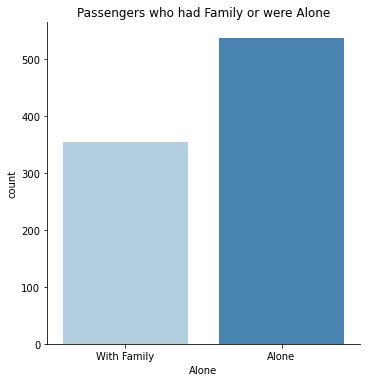

In [27]:
sns.catplot(x='Alone',data=titanic_df,palette='Blues',kind='count')
plt.title('Passengers who had Family or were Alone')
titanic_df['Alone'].value_counts()

The vast majority of people had no family on board with them. Around 60% of people were alone. 

To see how different factors affected the survival rate, let's make a few plots showing the relationship between survival rate and all of the other parameters we have investigated.

no     549
yes    342
Name: Survivor, dtype: int64

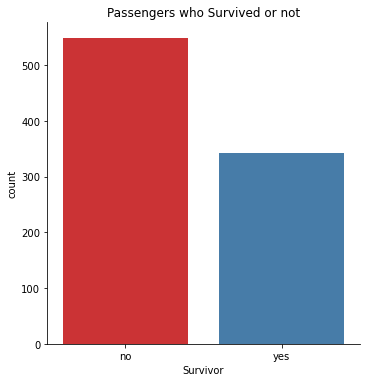

In [28]:
# made a new column with info based on Survived column
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
sns.catplot(x='Survivor',data=titanic_df,palette='Set1',kind='count')
plt.title('Passengers who Survived or not')
titanic_df['Survivor'].value_counts()

About 62% of people died.

Text(0.5, 1.0, 'Passengers who Survived or not per Person')

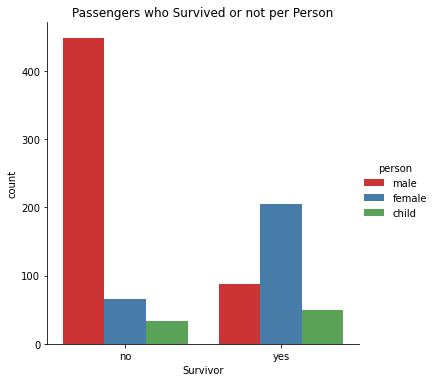

In [29]:
sns.catplot(x='Survivor',data=titanic_df, hue='person',palette='Set1',kind='count')
plt.title('Passengers who Survived or not per Person')

The number of males who died vastly outnumber the ones that survived. The majority of females survived, and the number of surviving children seems roughly equal to the number of children who died.

Text(0.5, 1.0, 'Plot of Class vs. Survival Rate')

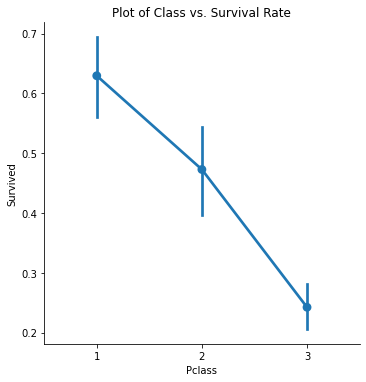

In [30]:
sns.catplot(x='Pclass',y='Survived',data=titanic_df,linestyles=["-"],kind='point')
plt.title('Plot of Class vs. Survival Rate')

This graph shows that the lower your class, the lower your survival rate.

Text(0.5, 1.0, 'Plot of Class vs. Survival Rate between Adults and Children')

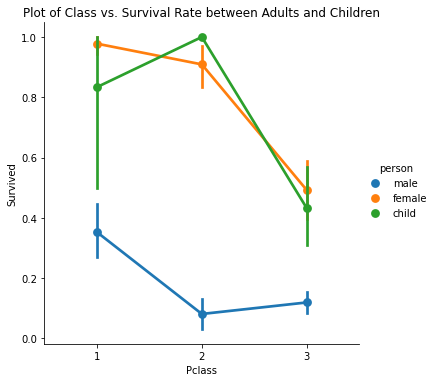

In [31]:
sns.catplot(x='Pclass',y='Survived', hue='person', data=titanic_df,kind='point')
plt.title('Plot of Class vs. Survival Rate between Adults and Children')

This graph shows that overall, the survival rate for men was by far the lowest. Interestingly, there is a large survival rate range for children in 1st class. This is likely due to there being very few children in first class. Therefore any change in data will produce extreme results. This is particularly true of binary data like survival condition (only yes or no).

Text(0.5, 1.0, 'Scatter Plot of Age vs. Survival Rate with Regression Line')

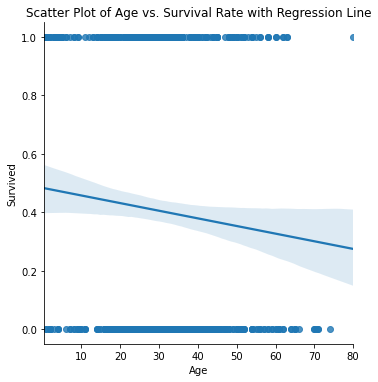

In [32]:
sns.lmplot(x='Age',y='Survived',data=titanic_df)
plt.title('Scatter Plot of Age vs. Survival Rate with Regression Line')

There seems to be a slight negative correlation between age and survival rate.

Text(0.5, 1.0, 'Scatter Plot of Age vs. Survival Rate per Class with Regression Lines')

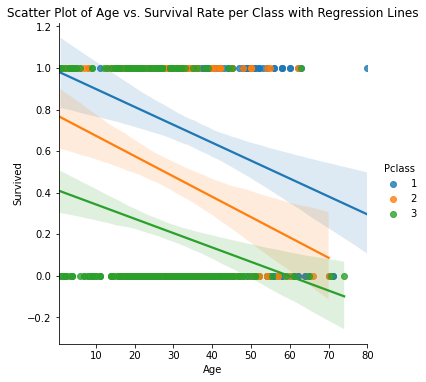

In [33]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df)
plt.title('Scatter Plot of Age vs. Survival Rate per Class with Regression Lines')

Text(0.5, 1.0, 'Age vs. Survival Rates per Class')

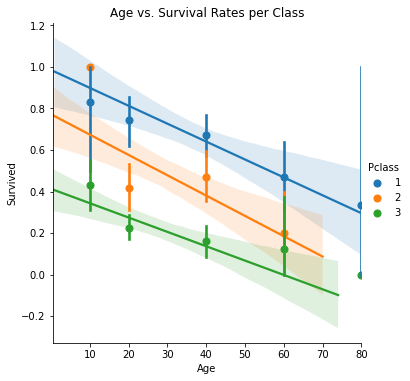

In [34]:
generations = [10,20,40,60,80,100]
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,x_bins=generations)
plt.title('Age vs. Survival Rates per Class')

Again, we see the negative correlation between age and survival rate, together with overall lower survival rate, the lower your class is.

Text(0.5, 1.0, 'Age vs. Survival Rates per Gender')

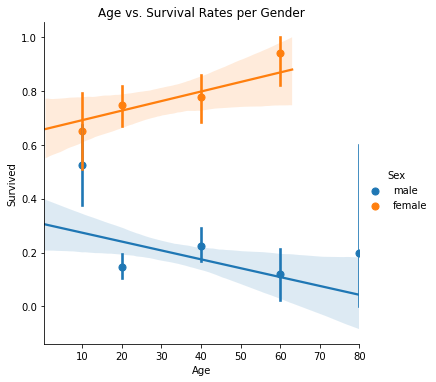

In [35]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,x_bins=generations)
plt.title('Age vs. Survival Rates per Gender')

Here, we actually see a positive correlation between survival rate and age for females. This indicates that not only were your chances for survival much higher if you were female, but also if you were an older female.

Text(0.5, 1.0, 'Age vs. Survival Rates for those with and without Family Members')

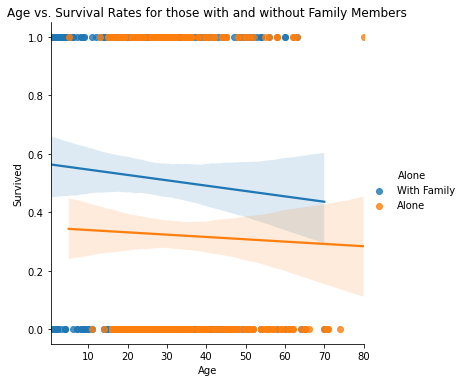

In [36]:
sns.lmplot(x='Age',y='Survived',hue='Alone',data=titanic_df)
plt.title('Age vs. Survival Rates for those with and without Family Members')

Survival rates among people who had no family on board were slightly lower than that of those who had family members aboard.

# Conclusion

There were about twice as many male passengers as there wer female. The majority of people were 3rd class, the majority of 3rd class passengers were also male. About 10% of the passengers or so were children.

A huge portion of the passengers on board were between the ages of 20 and 38. The mean age was 29.7. The youngest aboard was about 5 months old and the oldest was 80. Of the children, a large proportion were either infants or toddlers.

Almost all of the passengers aboard who had cabins were 1st class. The top 3 decks (A, B and C) were exclusively populated by 1st class passengers. Deck D was mainly 1st class with some 2nd class passengers. Some of all 3 classes had cabins on deck E, and deck F only had 2nd and 3rd class passengers.

Most passengers boarded at Southampton, and most of those were 3rd class.

About 60% of passengers had no family on board with them.

About 62% of passengers died. Most of which were men.

Overall, you were more likely to survive if:

- You were a higher class passenger.
- You were younger.
- You had family on board with you.
- You were female. And added to that, the older the female you were, the higher your chance of survival.